# ORTHOGONAL POLYNOMIAL DENSITY ESTIMATION
## Preliminaries
### Imports

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
import pandas as pd
from uuid import uuid4

from lpde.geometry import WidthOf, Window, PointAt, BoundingBox, Mapper, Grid
from lpde.estimators import ParallelEstimator
from lpde.estimators.datatypes import Event, Degree, Action, Scalings, Signal

### Notebook settings

In [61]:
%matplotlib notebook

## Density Estimation
### Initialize

In [62]:
legendre_width = WidthOf(1.8)

center = PointAt(0, 0)
window = Window(1.8, 1.8)
bounds = BoundingBox(center, window)

mapper = Mapper(bounds, legendre_width)

degree = Degree(20, 20)
density = ParallelEstimator(degree, mapper)

action = Action.ADD
point = PointAt(0.5, 0.5)
event = Event(uuid4(), action, point)

grid = Grid(100, 100)

### Create mock data streams

In [63]:
def gaussian():
    x, y = np.random.multivariate_normal((0,0), ((0.1,0), (0,0.1)))
    if (-0.9 <= x <= 0.9) and (-0.9 <= y <= 0.9):
        return x, y
    else:
        return gaussian()

def uniform():
    return np.random.uniform(low=-0.9, high=0.9, size=2)

locations = []

def new_event(dist):
    location = dist()
    locations.append(location)
    point = PointAt(*location)
    return Event(uuid4(), Action(1), point)

def random_event(dist):
    event_type = np.random.randint(low=-1, high=2)
    if event_type == 1:
        location = dist()
        point = PointAt(*location)
        return Event(uuid4(), Action(1), point)
    elif event_type == 0:
        location = dist()
        point = PointAt(*location)
        column = density._phi.sample(1, axis=1).columns.values[0]
        return Event(column, Action(0), point)
    column = density._phi.sample(1, axis=1).columns.values[0]
    return Event(column, Action(-1))

In [64]:
density.controller.start(2, 1.0)

/Users/georg/Documents/Python/LPDE/lpde/estimators/parallel/minimizer.py:78: RuntimeWarning: overflow encountered in double_scalars
  return self.__neg_log_l(c[1:]) + c[0]*self.__norm(c[1:])
/Users/georg/Documents/Python/LPDE/lpde/estimators/parallel/minimizer.py:78: RuntimeWarning: overflow encountered in double_scalars
  return self.__neg_log_l(c[1:]) + c[0]*self.__norm(c[1:])
/Users/georg/Documents/Python/LPDE/lpde/estimators/parallel/minimizer.py:86: RuntimeWarning: overflow encountered in square
  return -log(square(c.dot(self.__phi_ijn))).sum()
/Users/georg/Documents/Python/LPDE/lpde/estimators/parallel/minimizer.py:82: RuntimeWarning: overflow encountered in multiply
  self.__grad_c[1:] = self.__grad_neg_log_l(c[1:]) + 2.0*c[0]*c[1:]


In [70]:
density.update_with(new_event(gaussian))

In [117]:
density.at(point)

40.181329245834192

In [119]:
density.controller.stop()

In [55]:
density.controller._Controller__smooth_coeffs.get_obj()[:]

[0.26684905087652655,
 0.005496974577411091,
 -0.19808027191358896,
 0.021504286378192364,
 0.08845395319999713,
 -0.025424131173348876,
 -0.02188495646468811,
 -0.009335260534294126,
 -0.046005232320579764,
 -0.016241638030281544,
 0.06712602341946625,
 0.07271290413546125,
 -0.018228355429351785,
 -0.04729136755903614,
 -0.008645676934000646,
 -0.004308594310742892,
 0.016201093766184175,
 -0.004141777210758323,
 -0.06960206810644962,
 0.021428154253479485,
 0.08978457235612794,
 0.03722867804284774,
 -0.0001986697067559912,
 -0.038262719038875445,
 -0.004536938712612381,
 0.018255004272574066,
 0.0014060237171519057,
 0.009415580857822074,
 0.01289985331807188,
 -0.019957967031335615,
 -0.01597929950940738,
 0.017555107996814104,
 0.006623521397842728,
 -0.012263080737572193,
 -0.0014306040427389437,
 -0.0024026643313689996,
 -0.007716907088388068,
 0.015058559273971296,
 0.02794059081242322,
 -0.006850572194949629,
 -0.04018526030012616,
 -0.006063193149225333,
 -0.2245839236394636

In [58]:
density._ParallelEstimator__c.vec

array([  2.66849051e-01,   5.49697458e-03,  -1.98080272e-01,
         2.15042864e-02,   8.84539532e-02,  -2.54241312e-02,
        -2.18849565e-02,  -9.33526053e-03,  -4.60052323e-02,
        -1.62416380e-02,   6.71260234e-02,   7.27129041e-02,
        -1.82283554e-02,  -4.72913676e-02,  -8.64567693e-03,
        -4.30859431e-03,   1.62010938e-02,  -4.14177721e-03,
        -6.96020681e-02,   2.14281543e-02,   8.97845724e-02,
         3.72286780e-02,  -1.98669707e-04,  -3.82627190e-02,
        -4.53693871e-03,   1.82550043e-02,   1.40602372e-03,
         9.41558086e-03,   1.28998533e-02,  -1.99579670e-02,
        -1.59792995e-02,   1.75551080e-02,   6.62352140e-03,
        -1.22630807e-02,  -1.43060404e-03,  -2.40266433e-03,
        -7.71690709e-03,   1.50585593e-02,   2.79405908e-02,
        -6.85057219e-03,  -4.01852603e-02,  -6.06319315e-03,
        -2.24583924e-01,  -1.07747530e-02,   1.52920692e-01,
        -9.76571499e-03,  -5.42731587e-02,   2.28627412e-03,
         5.01176578e-03,

In [ ]:
try:
    density._Parallel__phi_queue.put('ada')
except AssertionError:
    print('suis')

### Timings of density estimation

In [104]:
#%%time
for i in range(100):
    density.update_with(new_event(gaussian))
#while not density._phi_queue_empty:
 #   pass

In [ ]:
%%time
for i in range(1000):
    density.update_with(random_event(gaussian))
while not density._phi_queue_empty:
    pass

In [ ]:
%%time
for i in range(1000):
    density.at(new_event(uniform).location)
while not density._phi_queue_empty:
    pass

__Timings__

33 ms per additive update with uniform distribution

31 ms per random update with uniform distribution

0.6 ms per evaluation at point

### Plot final density

<IPython.core.display.Javascript object>


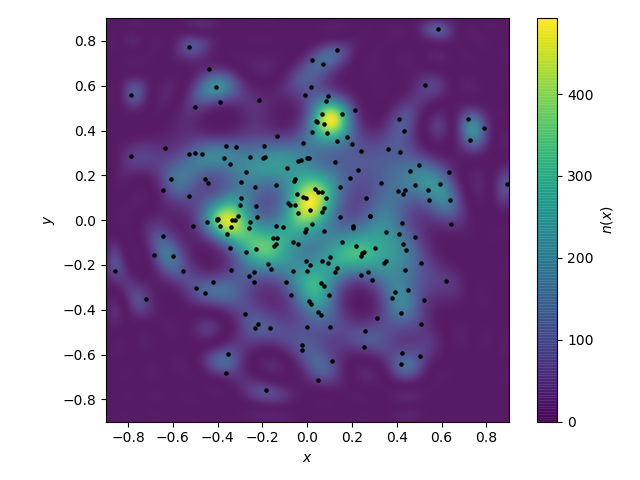

In [120]:
n_hat = density.on(grid)

fig, ax = plt.subplots()
ax.set(xlabel=r'$x$', ylabel=r'$y$')
ax.scatter(*zip(*locations), s=5, c='k')
contour = ax.imshow(n_hat,
                    cmap='viridis',
                    alpha=0.9,
                    extent=bounds.x_range+bounds.y_range,
                    origin='lower',
                    interpolation='bicubic')
cbar = plt.colorbar(contour, ax=ax, label=r'$n(x)$')
fig.tight_layout()

In [ ]:
from bokeh.io import output_file, show
from bokeh.plotting import figure
from bokeh.tile_providers import STAMEN_TONER, STAMEN_TERRAIN

bound = 20000000 # meters
fig = figure(tools='pan, wheel_zoom', x_range=(-bound, bound), y_range=(-bound, bound))
fig.axis.visible = False
fig.add_tile(STAMEN_TERRAIN)
output_file("stamen_toner_plot.html")
show(fig)

In [ ]:
from bokeh.plotting import figure, show, output_file

p = figure(x_range=bounds.x_range, y_range=bounds.y_range)

# must give a vector of image data for image parameter
p.image(image=[n_hat],
        x=bounds.x_range[0],
        y=bounds.y_range[0],
        dw=bounds.window[0],
        dh=bounds.window[1],
        palette="Spectral11",
        alpha=0.8)

output_file("image.html", title="image.py example")

show(p)  # open a browser

In [ ]:
bounds.center

In [ ]:
lower = center.position - window.dimensions/2.0
upper = center.position + window.dimensions/2.0

In [ ]:
x, y = tuple(zip(lower, upper))

In [ ]:
bounds.window

In [ ]:
from multiprocessing import Value

In [ ]:
value = Value('i', 0)

In [ ]:
value.value

In [ ]:
type(value)

In [ ]:
value.